# ========================================
# SISTEMA INTELIGENTE DE SCORING CREDITICIO 
# CON REDES NEURONALES PROFUNDAS (DNN)
# ========================================

### Evaluación Modular - Módulo 7
---

## *Objetivo*

Diseñar, entrenar y evaluar un modelo de red neuronal profunda para predecir la probabilidad
de impago de clientes bancarios, utilizando un conjunto de datos realista. El modelo debe ser
explicable, eficiente y presentar resultados interpretables para su uso en contextos
financieros.

---
## *Contexto*

Las entidades financieras deben decidir si otorgan o no un crédito a un cliente. Esta decisión, si
se basa en modelos poco explicables, puede generar sesgos, exclusiones injustas o pérdida
económica. Se busca construir un modelo moderno, basado en redes neuronales profundas, que
sea a la vez preciso y explicable.

---

## *Resumen*

*Se desarrolló un sistema de scoring crediticio basado en redes neuronales profundas para predecir la probabilidad de impago de clientes bancarios, comenzando con un análisis exploratorio que identificó diferencias entre buenos y malos pagadores, especialmente en monto y duración del crédito. Tras preprocesar los datos y aplicar SMOTE para balancear clases, se entrenaron dos modelos: una DNN simple y una ResNet tabular. La DNN simple mostró un desempeño superior, con accuracy de 70,5% y AUC de 0,78, generalizando bien y equilibrando la predicción entre clientes “good” y “bad”. En cambio, la ResNet obtuvo accuracy de 64% y AUC de 0,64, clasificando mejor a clientes “bad” pero con un riesgo elevado de falsos positivos. En conclusión, la DNN simple se posiciona como la opción más confiable y efectiva para decisiones de crédito, aunque aún puede mejorarse la predicción de clientes solventes y la interpretabilidad del modelo.*

---

## ✍️ *Autor*

`Claudio Andrés Díaz Vargas`


---

# Explicación paso a paso del proyecto en código python

---

### Descripción del Proyecto

El presente proyecto consistió en el desarrollo de un sistema inteligente de scoring crediticio utilizando redes neuronales profundas, con el objetivo de predecir la probabilidad de impago de clientes bancarios. Para ello, se trabajó con el dataset German Credit Data de la UCI Machine Learning Repository, que contiene información de 1.000 clientes con variables numéricas y categóricas relacionadas con edad, monto y duración de los créditos, historial financiero, entre otros. El análisis incluyó un proceso de preprocesamiento de datos (normalización, balanceo con SMOTE y asignación de pesos de clase) y la construcción de dos modelos principales: una DNN simple y una ResNet tabular, comparando sus resultados en métricas de clasificación como accuracy, AUC y matriz de confusión. Es importante señalar que, en esta primera etapa, no se abordaron técnicas de explicabilidad de modelos como SHAP o LIME, por lo que la interpretación detallada de la importancia de variables y la transparencia del modelo quedan como un aspecto pendiente a desarrollar en trabajos futuros.

---

# **Introducción**

En el sector financiero, la correcta evaluación del riesgo crediticio es fundamental para minimizar pérdidas económicas y fomentar la inclusión de clientes solventes. Tradicionalmente, este proceso se ha realizado mediante modelos estadísticos clásicos, pero en la actualidad las técnicas de Machine Learning y, en particular, las redes neuronales profundas (DNN) ofrecen nuevas oportunidades para capturar patrones complejos en los datos y mejorar la capacidad predictiva de los sistemas de scoring. Sin embargo, el uso de estos modelos conlleva retos relacionados con la interpretabilidad y la confianza regulatoria, ya que las entidades financieras requieren explicaciones claras de las decisiones algorítmicas. En este proyecto se propone diseñar y evaluar un sistema de scoring crediticio basado en redes neuronales profundas utilizando el German Credit Data (UCI), comparando el desempeño de una DNN simple frente a una ResNet tabular, con el fin de determinar cuál resulta más adecuada en este contexto.

---

# **Desarrollo**

En esta sección se encuentra el cuerpo del análisis enumeradas por:

0. **Preámbulo: Carga e instalación de los módulos necesrios**
1. **Carga y análisis de datos (Exploratorio de datos-EDA)**
2. **Preprocesamiento de los datos**
3. **Construcción del modelo**
4. **Evaluación del modelo**


## 0. Preámbulo: Carga e instalación de los módulos necesarios 

Para empezar necesitamos instalar los módulos como `ucimlrepo`para descargar los datos `German Credit Data` para poder aplicarles los procedimientos necesarios, adecuados y pertinentes para poder predecir la probabilidad de impago de clientes bancarios. Y `pip install -U imbalanced-learn` con el objetivo de balancear los clientes “good” y “bad” antes de entrenar la red neuronal.

In [3]:
!pip install ucimlrepo


In [9]:
pip install -U imbalanced-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.0/240.0 kB 1.7 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.11.0
    Uninstalling imbalanced-learn-0.11.0:
      Successfully uninstalled imbalanced-learn-0.11.0
Note: you may need to restart the kernel to use updated packages.


## 1. Carga y análisis de datos (Exploratorio de datos-EDA)

En este paso cargamos el dataset (con metadatos ya que usamos `ucimlrepo`), luego detectamos la variable objetivo y la normaliza a etiquetas “good/bad”. Después, separamos columnas categóricas y numéricas automáticamente por `dtype`.

* En el dataset se tiene un registro de 1000 datos y con 21 variables (columnas) que se detallan a continuación:

1. `checking_status`

Estado de la cuenta corriente del cliente.

Valores típicos:

  * $<0$ → saldo negativo

  * $0<=X<200$ → saldo bajo

  * $>=200$ → saldo alto

  * no checking → sin cuenta

2. `duration_months`

   Duración del crédito solicitado (en meses).

3. `credit_history`

   Historial crediticio.
   Ejemplos: no credits taken, all credits paid, existing credits paid, critical account.

4. `purpose`

   Motivo del crédito.
   Ejemplos: car, furniture, education, business, domestic appliance, repairs, etc.

5. `credit_amount`

   Monto del crédito solicitado (en marcos alemanes).

6. `savings_account`

   Estado de cuentas de ahorro.
   Ejemplos: <100, 100<=X<500, 500<=X<1000, >=1000, unknown.

7. `employment_since`

   Tiempo en el empleo actual.
   Ejemplos: unemployed, <1, 1<=X<4, 4<=X<7, >=7.

8. `installment_rate_pct`

   Tasa de cuotas de pago (porcentaje de ingreso disponible que va a cuotas).

9. `personal_status_sex`

   Estado civil y sexo.
   Ejemplos: male single, male married, male divorced/separated, female.

10. `other_debtors`

   Otros deudores/garantes.
   Ejemplos: none, co-applicant, guarantor.

11. `residence_since`

   Tiempo de residencia en la dirección actual (en años).

12. `property`

   Tipo de propiedad o activos.
   Ejemplos: real estate, savings, car, unknown.

13. `age_years`

   Edad del cliente en años.

14. `other_installment_plans`

   Otros planes de pago.
   Ejemplos: bank, stores, none.

15. `housing`

   Tipo de vivienda.
   Ejemplos: own, rent, for free.

16. `existing_credits`

   Número de créditos existentes en este banco.

17. `job`

   Tipo de empleo/profesión.
   Ejemplos: unemployed/unskilled, unskilled resident, skilled, highly skilled.

18. `people_liable`

   Número de personas a cargo económicamente.

19. `telephone`

   Tiene teléfono registrado.
   Ejemplos: yes, none.

20. `foreign_worker`

   Si es trabajador extranjero (yes / no).

21. `class (label)

  * 1 = Good credit risk (el cliente probablemente pagará).
  * 2 = Bad credit risk (el cliente probablemente incumplirá).

Qué nos devolvería:

* Conteos y porcentajes de la distribución de clases (gráfico incluido).

* Un resumen de categóricas (número de categorías y la más frecuente).

* Estadísticos descriptivos de numéricas + histogramas y boxplots.

* Medias por clase (para intuición inicial).


Diccionario de variables (Markdown):

| Variable | Descripción |
|----------|-------------|
| checking_status | Estado de la cuenta corriente (categoría) |
| duration_months | Duración del crédito en meses |
| credit_history | Historial de crédito |
| purpose | Propósito del crédito |
| credit_amount | Monto del crédito |
| savings_account | Ahorros (categoría) |
| employment_since | Años en empleo actual |
| installment_rate_pct | Tasa de cuotas en porcentaje del ingreso |
| personal_status_sex | Estado civil y sexo |
| other_debtors | Otros deudores/garantes |
| residence_since | Años de residencia actual |
| property | Tipo de propiedad |
| age_years | Edad en años |
| other_installment_plans | Otros planes de pago |
| housing | Tipo de vivienda |
| existing_credits | Número de créditos existentes en este banco |
| job | Categoría laboral |
| people_liable | Número de personas dependientes |
| telephone | Teléfono registrado (sí/no) |
| foreign_worker | Trabajador extranjero (sí/no

,checking_status,duration_months,credit_history,purpose,credit_amount,savings_account,employment_since,installment_rate_pct,personal_status_sex,other_debtors,residence_since,property,age_years,other_installment_plans,housing,existing_credits,job,people_liable,telephone,foreign_worker,class
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201,2



Variable objetivo detectada: class

Columnas categóricas (13):
['checking_status', 'credit_history', 'purpose', 'savings_account', 'employment_since', 'personal_status_sex', 'other_debtors', 'property', 'other_installment_plans', 'housing', 'job', 'telephone', 'foreign_worker']

Columnas numéricas (7):
['duration_months', 'credit_amount', 'installment_rate_pct', 'residence_since', 'age_years', 'existing_credits', 'people_liable']

Distribución de clases (conteos):
class
good    700
bad     300
Name: count, dtype: int64

Distribución de clases (porcentaje):
class
good    70.0
bad     30.0
Name: proportion, dtype: float64


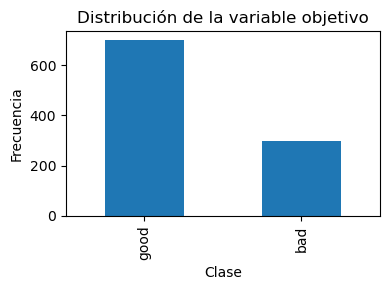


Resumen de variables categóricas:


,variable,tipo,n_categorias,top_categoria,freq_top
2,purpose,categorica,10,A43,280
1,credit_history,categorica,5,A32,530
4,employment_since,categorica,5,A73,339
3,savings_account,categorica,5,A61,603
0,checking_status,categorica,4,A14,394
10,job,categorica,4,A173,630
5,personal_status_sex,categorica,4,A93,548
7,property,categorica,4,A123,332
9,housing,categorica,3,A152,713
6,other_debtors,categorica,3,A101,907


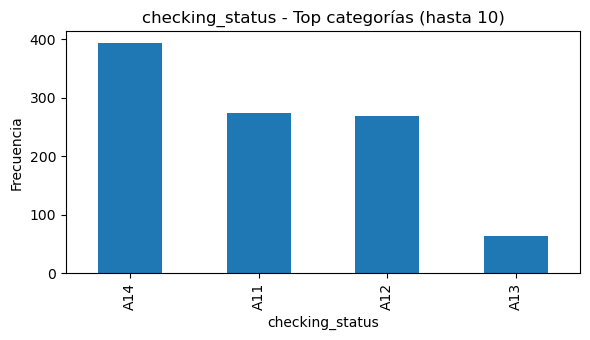

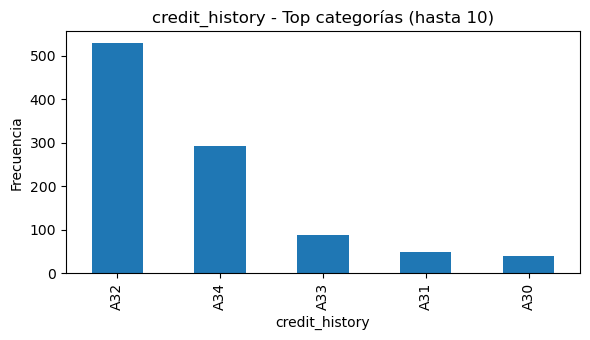

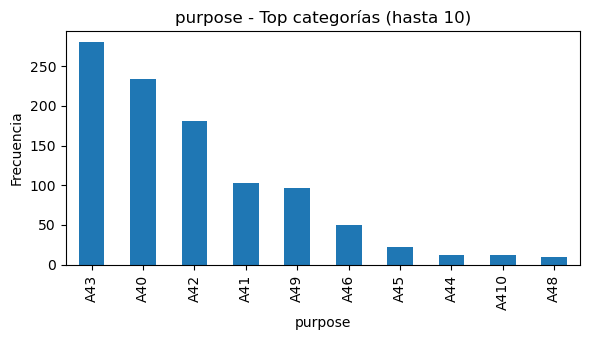

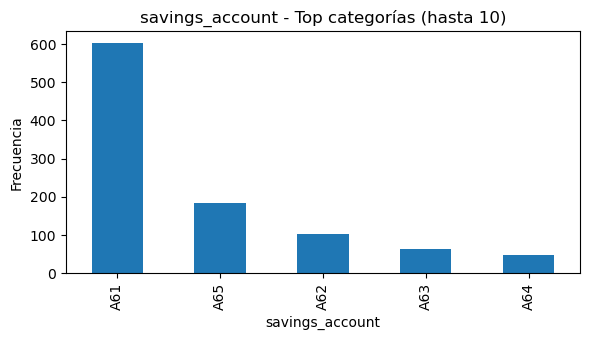

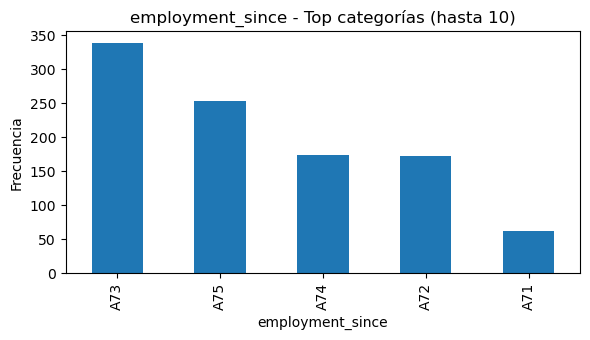

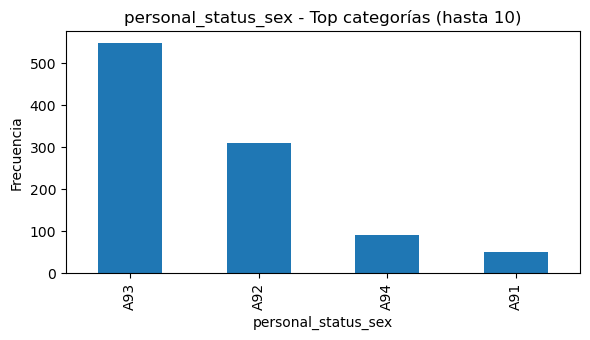


Estadísticos descriptivos (numéricas):


,count,mean,std,min,25%,50%,75%,max,missing
duration_months,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0,0
credit_amount,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0,0
installment_rate_pct,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0,0
residence_since,1000.0,2.845,1.103718,1.0,2.0,3.0,4.00,4.0,0
age_years,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0,0
existing_credits,1000.0,1.407,0.577654,1.0,1.0,1.0,2.00,4.0,0
people_liable,1000.0,1.155,0.362086,1.0,1.0,1.0,1.00,2.0,0


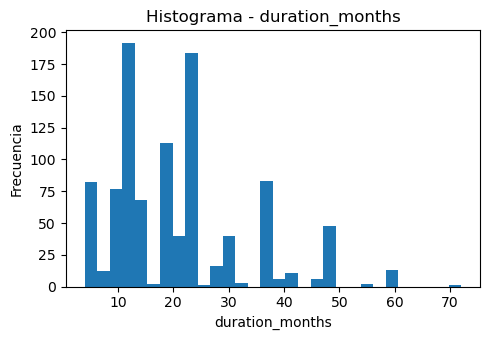

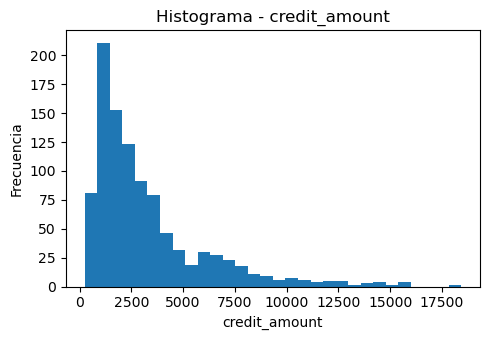

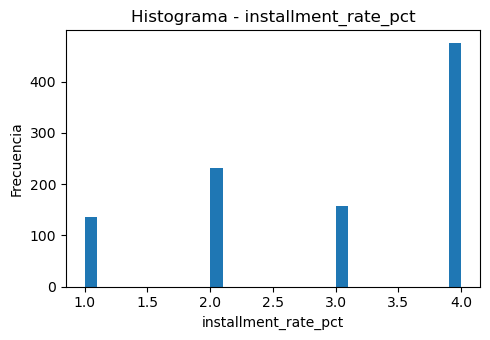

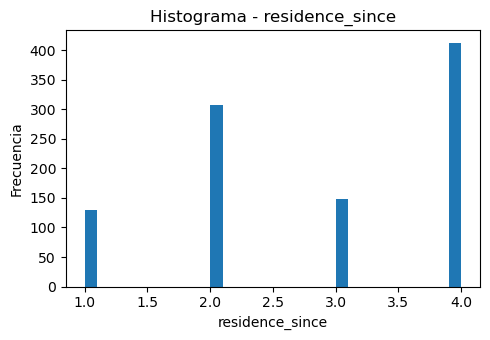

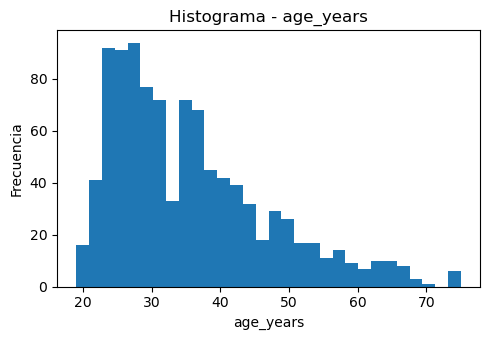

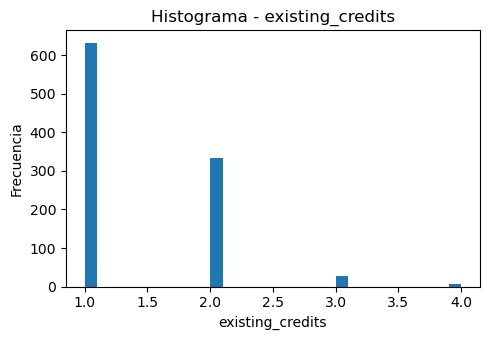

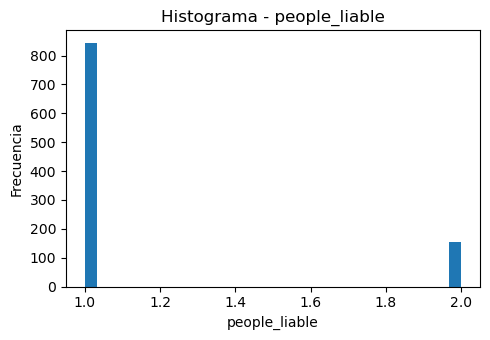

<Figure size 400x350 with 0 Axes>

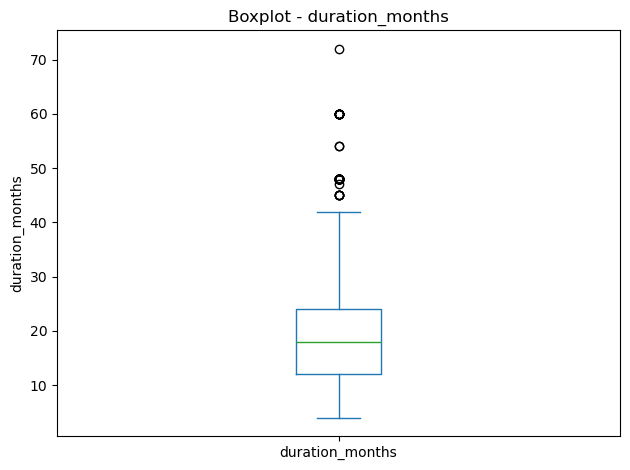

<Figure size 400x350 with 0 Axes>

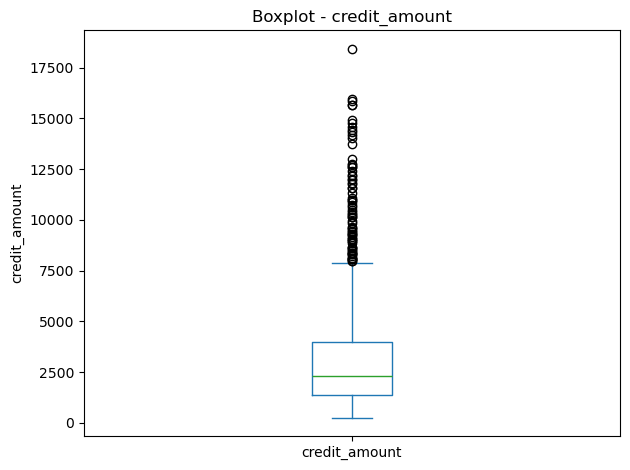

<Figure size 400x350 with 0 Axes>

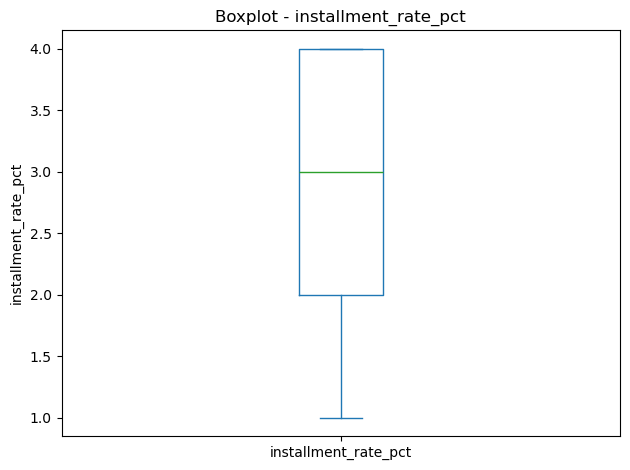

<Figure size 400x350 with 0 Axes>

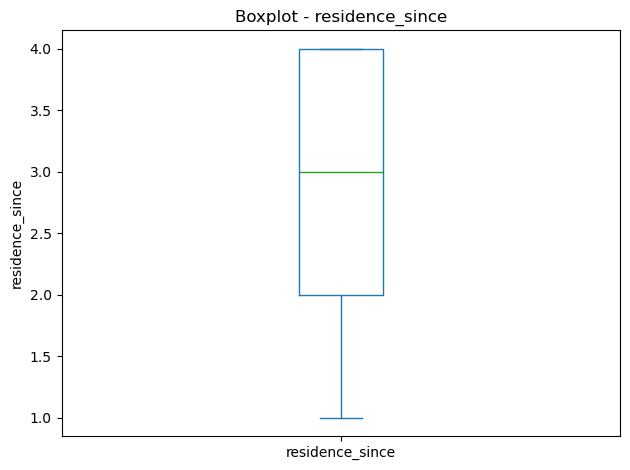

<Figure size 400x350 with 0 Axes>

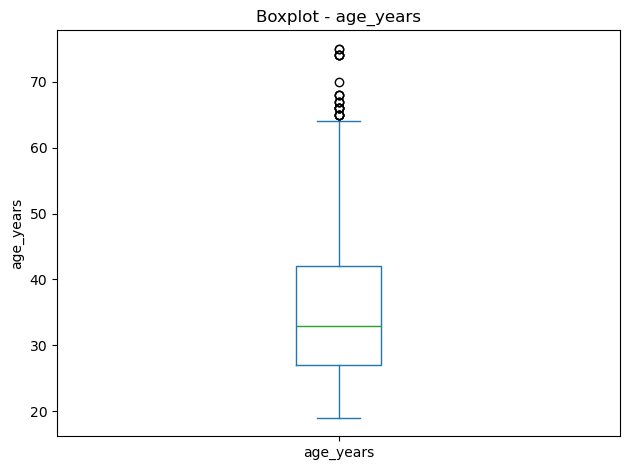

<Figure size 400x350 with 0 Axes>

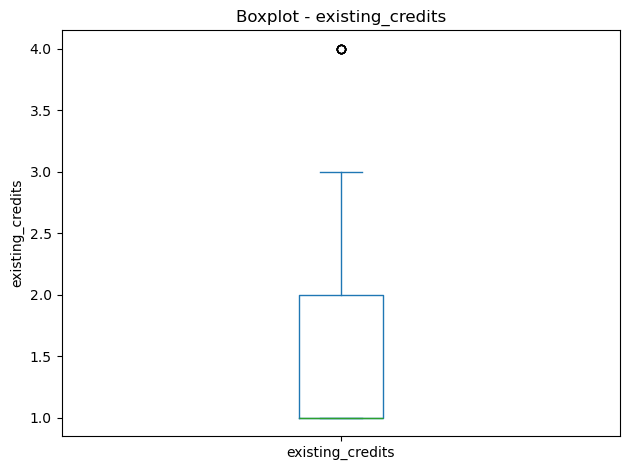

<Figure size 400x350 with 0 Axes>

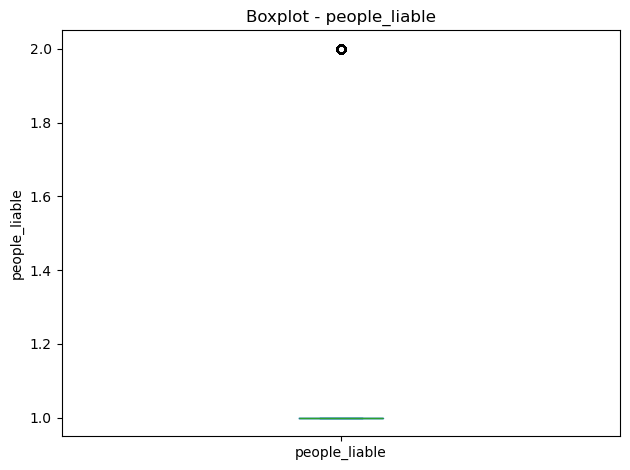


Medias de variables numéricas por clase:


class,bad,good
duration_months,24.860000,19.207143
credit_amount,3938.126667,2985.457143
installment_rate_pct,3.096667,2.920000
residence_since,2.850000,2.842857
age_years,33.963333,36.224286
existing_credits,1.366667,1.424286
people_liable,1.153333,1.155714


In [44]:
# =========================================================
# German Credit - Paso 1: Carga y Análisis Exploratorio
# =========================================================

# --- Ajustes generales
import sys, os, textwrap, warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", 100)
pd.set_option("display.width", 120)

# ---------------------------------------------------------
# Opción A (recomendada): cargar desde UCI con ucimlrepo
#   - Requiere: pip install ucimlrepo
#   - Carga X (features) y y (target) con metadatos
# ---------------------------------------------------------
USE_UCIMLREPO = True  # pon en False si usarás archivos locales

if USE_UCIMLREPO:
    try:
        from ucimlrepo import fetch_ucirepo
        ds = fetch_ucirepo(id=144)  # Statlog (German Credit Data)
        X = ds.data.features.copy()
        y = ds.data.targets.copy()
        df = pd.concat([X, y], axis=1)

        # Renombrar columnas con nombres "amigables" de UCI
        colnames = [
            "checking_status", "duration_months", "credit_history", "purpose", "credit_amount",
            "savings_account", "employment_since", "installment_rate_pct", "personal_status_sex",
            "other_debtors", "residence_since", "property", "age_years", "other_installment_plans",
            "housing", "existing_credits", "job", "people_liable", "telephone", "foreign_worker", "class"
        ]
        df.columns = colnames

    except Exception as e:
        print("Fallo al cargar con ucimlrepo. Cambia USE_UCIMLREPO=False para cargar desde archivos locales.")
        raise e

else:
    # -----------------------------------------------------
    # Opción B: lectura local desde archivos descargados de UCI
    # -----------------------------------------------------
    DATA_DIR = "./"  # cambia a tu ruta
    USE_NUMERIC = False  # True si quieres usar 'german.data-numeric'

    colnames = [
        "checking_status", "duration_months", "credit_history", "purpose", "credit_amount",
        "savings_account", "employment_since", "installment_rate_pct", "personal_status_sex",
        "other_debtors", "residence_since", "property", "age_years", "other_installment_plans",
        "housing", "existing_credits", "job", "people_liable", "telephone", "foreign_worker", "class"
    ]

    if USE_NUMERIC:
        path = os.path.join(DATA_DIR, "german.data-numeric")
        df = pd.read_csv(path, sep=r"\s+", header=None)
        if df.shape[1] >= 2:
            df = df.rename(columns={df.columns[-1]: "class"})
    else:
        path = os.path.join(DATA_DIR, "german.data")
        df = pd.read_csv(path, sep=r"\s+", header=None, names=colnames)

# =========================================================
# Diccionario de variables (Markdown)
# =========================================================
variables_dict = {
    "checking_status": "Estado de la cuenta corriente (categoría)",
    "duration_months": "Duración del crédito en meses",
    "credit_history": "Historial de crédito",
    "purpose": "Propósito del crédito",
    "credit_amount": "Monto del crédito",
    "savings_account": "Ahorros (categoría)",
    "employment_since": "Años en empleo actual",
    "installment_rate_pct": "Tasa de cuotas en porcentaje del ingreso",
    "personal_status_sex": "Estado civil y sexo",
    "other_debtors": "Otros deudores/garantes",
    "residence_since": "Años de residencia actual",
    "property": "Tipo de propiedad",
    "age_years": "Edad en años",
    "other_installment_plans": "Otros planes de pago",
    "housing": "Tipo de vivienda",
    "existing_credits": "Número de créditos existentes en este banco",
    "job": "Categoría laboral",
    "people_liable": "Número de personas dependientes",
    "telephone": "Teléfono registrado (sí/no)",
    "foreign_worker": "Trabajador extranjero (sí/no)",
    "class": "Variable objetivo: calidad del crédito (good/bad)"
}

print("\nDiccionario de variables (Markdown):\n")
print("| Variable | Descripción |")
print("|----------|-------------|")
for var, desc in variables_dict.items():
    print(f"| {var} | {desc} |")

# =========================================================
# Limpieza mínima y chequeos
# =========================================================

print("\nDimensiones del dataset:", df.shape)
print("\nVista rápida:")
display(df.head())

# Detección de target
target_candidates = [c for c in df.columns if c.lower() in ("class", "target", "risk", "creditability")]
target = target_candidates[0] if target_candidates else df.columns[-1]
print("\nVariable objetivo detectada:", target)

# Normalización de etiquetas
def map_labels(s):
    if pd.api.types.is_numeric_dtype(s):
        return s.map({1: "good", 2: "bad"}).fillna(s)
    return s

df[target] = map_labels(df[target]).astype("category")

# =========================================================
# Separación de variables categóricas vs numéricas
#   - Usamos inferencia por dtype (object/category -> categórica; numérica -> numérica)
#   - Si usaste 'german.data-numeric', habrá más columnas numéricas/indicadores.
# =========================================================
feature_cols = [c for c in df.columns if c != target]
cat_cols = [c for c in feature_cols if df[c].dtype.name in ("object", "category")]
num_cols = [c for c in feature_cols if c not in cat_cols]

print("\nColumnas categóricas ({}):".format(len(cat_cols)))
print(cat_cols)
print("\nColumnas numéricas ({}):".format(len(num_cols)))
print(num_cols)

# =========================================================
# Distribución de clases
# =========================================================
print("\nDistribución de clases (conteos):")
print(df[target].value_counts(dropna=False))

print("\nDistribución de clases (porcentaje):")
print((df[target].value_counts(normalize=True)*100).round(2))

# Visualización rápida de la distribución de clases
plt.figure(figsize=(4,3))
df[target].value_counts().plot(kind="bar")
plt.title("Distribución de la variable objetivo")
plt.xlabel("Clase")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()

# =========================================================
# Resumen de variables categóricas
#   - número de categorías por variable
#   - top 10 categorías más frecuentes de cada variable (si aplica)
# =========================================================
cat_summary = []
for c in cat_cols:
    n_unique = df[c].nunique(dropna=False)
    top_vals = df[c].value_counts(dropna=False).head(10)
    cat_summary.append({
        "variable": c,
        "tipo": "categorica",
        "n_categorias": n_unique,
        "top_categoria": top_vals.index[0],
        "freq_top": int(top_vals.iloc[0])
    })

cat_summary_df = pd.DataFrame(cat_summary).sort_values(["n_categorias", "variable"], ascending=[False, True])
print("\nResumen de variables categóricas:")
display(cat_summary_df)

# Ejemplo de gráficos de barras para algunas categóricas clave (limita a 6 para no saturar)
sample_cats = cat_cols[:6]
for c in sample_cats:
    plt.figure(figsize=(6,3.5))
    df[c].value_counts().head(10).plot(kind="bar")
    plt.title(f"{c} - Top categorías (hasta 10)")
    plt.xlabel(c)
    plt.ylabel("Frecuencia")
    plt.tight_layout()
    plt.show()

# =========================================================
# Resumen de variables numéricas
#   - estadísticas descriptivas
#   - histogramas y boxplots para detectar asimetrías/outliers
# =========================================================
if num_cols:
    print("\nEstadísticos descriptivos (numéricas):")
    display(df[num_cols].describe().T.assign(missing=df[num_cols].isna().sum()))

    # Histogramas
    for c in num_cols[:8]:  # limita a 8 para claridad
        plt.figure(figsize=(5,3.5))
        df[c].plot(kind="hist", bins=30)
        plt.title(f"Histograma - {c}")
        plt.xlabel(c)
        plt.ylabel("Frecuencia")
        plt.tight_layout()
        plt.show()

    # Boxplots
    for c in num_cols[:8]:
        plt.figure(figsize=(4,3.5))
        df[[c]].plot(kind="box")
        plt.title(f"Boxplot - {c}")
        plt.ylabel(c)
        plt.tight_layout()
        plt.show()

# =========================================================
# Chequeo rápido de balance por clase en variables numéricas
#   - medias por clase (útil para intuición inicial)
# =========================================================
if num_cols:
    means_by_class = df.groupby(target)[num_cols].mean().T
    print("\nMedias de variables numéricas por clase:")
    display(means_by_class)

# =========================================================
# Nota:
# - UCI indica dos versiones: 'german.data' (original, con atributos categóricos/simbólicos)
#   y 'german.data-numeric' (codificada/expandida para algoritmos que requieren numérico).
# - No hay valores faltantes según la ficha de UCI.
# - El uso de una matriz de costos es recomendado (5x más costoso clasificar mal como 'good').
#   (Estos puntos se considerarán en etapas posteriores del proyecto.)
# =========================================================


### *Interpretación de los resultados:*

En los resultados obtenidos a través del Análisis Exploratorio de Datos se desprende las siguientes observaciones:

**1° Parte:**

* En la distribución de la variable objetivo: Tenemos que el 70% (700) son de clases etiquetadas como `good`, mientras que el 30% (300) son etiquetadas como `bad`.

* Podemos ver un resumen de las frecuencias distribuidas de cada variable categórica (cada gráfico de barra).

* También podemos observar los estadísticos descriptivos de las variables numericas del dataset:

  * `duration_months`: En promedio, la duración del crediticio solicitado es de 21 meses (~20.903). Han habido casos que la duración superan los 60 meses (de acuerdo al grafico boxplot pertinente observado). 
 
  * `credit_amount`: En promedio, el monto del crédito solicitado es de 3.271,258 marcos alemanes. Pero hay muchos casos en donde sea han solicitados montos muy superiores al promedio que superan incluso los 8.000 marcos alemanes. (De acuerdo al gráfico boxplot pertinente observado).
 
  * `installment_rate_pct`: En promedio, la tasa de cuotas de pago (porcentaje de ingreso disponible que va en cuotas) es de un 3% (~2.973%).
 
  * `residence_since`: En promedio, el tiempo de residencia en la dirección actual es de casi 3 años (~2.845).
 
  * `age_years`: En promedio, la edad del cliente rondean los 35-36 (~35.546) años. Pero hay casos en donde la edad de aquellos clientes que solicitan el crediticio superan los 65 años. (De acuerdo al gráfico boxplot pertinente observado).
 
  * `existing_credits`: En promedio, el número de créditos existentes en este banco es de 1 (~1.407) crédito. Pero ha habido casos específicos en que el numero de créditos han llegado a 4. (De acuerdo al gráfico boxplot pertinente observado).
 
  * `people_liable`: En promedio, el número de personas a cargo económicamente es de 1 sola. Pero han habido casos donde el número de persona a cargo económicamente es 2. (De acuerdo al gráfico boxplot pertinente observado).
 
**2° Parte:**

De acuerdo a la tabla de resumen de las variables numéricas, se tiene las siguientes conclusiones:

* Los malos pagadores (“bad”) se caracterizan por pedir créditos más largos y de mayor monto, y destinan una proporción un poco mayor de sus ingresos al pago de cuotas.

* En cambio, los buenos pagadores (“good”) tienden a ser ligeramente mayores en edad, lo que puede asociarse a más estabilidad financiera.

* Variables como `residence_since`, `existing_credits` y `people_liable` no muestran diferencias relevantes entre clases.
  
 
  

## 2. Preprocesamiento de los datos

En este paso, se realiza un pipeline la cual incluye:

1. Separación en `train/test` (con estratificación por clase para respetar el balance).

2. Codificación de variables categóricas (`OneHotEncoder`).

3. Escalado de variables numéricas (`StandardScaler`).

4. Manejo de desbalanceo con dos alternativas:

   * `SMOTE` (síntesis de ejemplos de la clase minoritaria).
  
   * Pesos en la función de pérdida (útil para redes neuronales).
  
*Una explicación rápida:*

* `OneHotEncoder` transforma las categóricas en columnas binarias.

* `StandardScaler` normaliza las numéricas (media 0, varianza 1).

* `SMOTE` crea ejemplos sintéticos de la clase minoritaria → dataset balanceado.

* `class_weights` ajusta la importancia de cada clase en la pérdida lo cual es útil en Keras/PyTorch.

In [50]:
# =========================================================
# Paso 2: Preprocesamiento - German Credit
# =========================================================

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

# -----------------------
# Variables
# -----------------------
target = "class"  # ajusta si tu dataset tiene otro nombre

feature_cols = [c for c in df.columns if c != target]
cat_cols = [c for c in feature_cols if df[c].dtype.name in ("object", "category")]
num_cols = [c for c in feature_cols if c not in cat_cols]

print("Categóricas:", cat_cols)
print("Numéricas:", num_cols)

# -----------------------
# División Train/Test
# -----------------------
X = df[feature_cols]
y = df[target].cat.codes  # convierte 'good'/'bad' a 0/1

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("Distribución original:")
print(y.value_counts(normalize=True))
print("Distribución train:")
print(y_train.value_counts(normalize=True))
print("Distribución test:")
print(y_test.value_counts(normalize=True))

# -----------------------
# Preprocesamiento:
# - OneHotEncoder para categóricas
# - StandardScaler para numéricas
# -----------------------
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
    ]
)

# -----------------------
# Manejo de desbalanceo
# Alternativa 1: SMOTE
# -----------------------
X_train_enc = preprocessor.fit_transform(X_train)
X_test_enc = preprocessor.transform(X_test)

print("Shape antes de SMOTE:", X_train_enc.shape, y_train.shape)

# Aplicamos SMOTE para balancear
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_enc, y_train)

print("Distribución después de SMOTE:")
print(pd.Series(y_train_bal).value_counts())

# -----------------------
# Alternativa 2: Pesos de clase
# (para usar directamente en la red neuronal, sin SMOTE)
# -----------------------
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight(
    class_weight="balanced",
    classes=np.unique(y_train),
    y=y_train
)
class_weights = dict(enumerate(class_weights))

print("Pesos de clase:", class_weights)

# -----------------------
# Resultados:
# - X_train_bal, y_train_bal -> listo para entrenar con SMOTE
# - X_test_enc, y_test -> listo para evaluar
# - class_weights -> opción para pasar a la red neuronal en vez de SMOTE
# -----------------------


Categóricas: ['checking_status', 'credit_history', 'purpose', 'savings_account', 'employment_since', 'personal_status_sex', 'other_debtors', 'property', 'other_installment_plans', 'housing', 'job', 'telephone', 'foreign_worker']
Numéricas: ['duration_months', 'credit_amount', 'installment_rate_pct', 'residence_since', 'age_years', 'existing_credits', 'people_liable']
Distribución original:
1    0.7
0    0.3
Name: proportion, dtype: float64
Distribución train:
1    0.7
0    0.3
Name: proportion, dtype: float64
Distribución test:
1    0.7
0    0.3
Name: proportion, dtype: float64
Shape antes de SMOTE: (800, 61) (800,)
Distribución después de SMOTE:
1    560
0    560
Name: count, dtype: int64
Pesos de clase: {0: 1.6666666666666667, 1: 0.7142857142857143}


1. **Variables categóricas y numéricas:**

  * Categóricas: Se tiene en el dataset un total de 13 variables de esta naturaleza. Las cuales son: `checking_status`, `credit_history`, `purpose`, `savings_account`, `employment_since`, `personal_status_sex`, `other_debtors`, `property`, `other_installment_plans`, `housing`, `job`, `telephone`, `foreign_worker`. Estos son atributos cualitativos que describen al cliente (estado de cuenta, historial crediticio, propósito del crédito, etc.). Estos necesitan codificación (`One-Hot` o `embeddings`) para usarlas en modelos.
    
  * Numéricas: Se tiene en el dataset un total de 7 variables de esta naturaleza. Las cuales son: `duration_months`, `credit_amount`, `installment_rate_pct`, `residence_since`, `age_years`, `existing_credits`, `people_liable`. Son directamente valores cuantitativos que se pueden `normalizar/escalar`.


2. **Distribución de clases (antes de balanceo):**

* `Original`, `train` y `test`:

1 → 70% (clase "good")  
0 → 30% (clase "bad")

Esto siginifica, claramente, que el dataset está desbalanceado. Lo que significa:

  * Hay más clientes buenos pagadores (70%)

  * Menos clientes malos pagadores (30%)

Y esto podría causar un problema para un modelo entrenado sin corrección ya que podría “aprender” a predecir casi siempre “good” y aún así obtener 70% de accuracy, pero, fallaría en detectar los malos pagadores, que son justo los más importantes en contexto financiero.

3. **SMOTE (Synthetic Minority Oversampling Technique):**

* Antes de `SMOTE` `Shape (800, 61) (800,)`: Son 800 muestras de entrenamiento y 61 features (características).

* Después de `SMOTE`:

1 → 560  
0 → 560

`SMOTE` generó nuevas observaciones sintéticas de la clase minoritaria (0 = bad) hasta igualar la clase mayoritaria (1 = good). Ahora el conjunto está balanceado (50/50), lo que mejora la capacidad del modelo para aprender a diferenciar ambas clases.

4. **Pesos de clase:**

* Los pesos calculados son las siguientes: `{0: 1.67, 1: 0.71}`

Esto significa que, si en vez de `SMOTE` decides entrenar el modelo con `class_weight`,

  * Los errores al clasificar un “bad” (0) tendrán un peso ≈ 2.3 veces más alto que los errores al clasificar un “good” (1).

  * El modelo así se “penaliza” más fuerte cuando falla en detectar un mal pagador. 

En conclusión, el dataset está desbalanceado (70/30), lo que se corrigió con `SMOTE` (ahora 50/50). 

En el contexto financiero, El `Error Tipo I` (falso positivo, clasificar “bad” como “good”) es muy costoso ya que el banco presta dinero a alguien que no paga. Y por su parte, el `Error Tipo II` (falso negativo, clasificar “good” como “bad”) es menos grave ya que se rechaza a un cliente que sí podría pagar.


## 3. Construcción del modelo

Aquí estructuramos el flujo en `Keras/TensorFlow`, comparando:

* Modelo base (DNN simple)

* Modelo moderno tipo `ResNet tabular` (con skip connections)

Además integramos:

* Regularización (`Dropout + L2`).

* Callbacks (`EarlyStopping`, `ReduceLROnPlateau`).

* Pesos de clase (para manejar desbalanceo).

Este script hace que:

* DNN simple: 2 capas densas con `Dropout + L2`.

* `ResNet tabular`: varias capas con skip connections (atajos de identidad).

* `Callbacks`:
  
  * `EarlyStopping` lo cual corta cuando no mejora la validación.
 
  * `ReduceLROnPlateau` lo cual baja el learning rate si se estanca.
 
* Evaluación: imprime `Loss`, `Accuracy`, `AUC` en el set de test.

In [52]:
# =========================================================
# Paso 3: Modelos de Redes Neuronales
# =========================================================
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers

# ---------------------------------------------------------
# Preparamos los datos (usando class_weights, más estable que SMOTE aquí)
# ---------------------------------------------------------
X_train_enc = preprocessor.fit_transform(X_train)
X_test_enc = preprocessor.transform(X_test)

input_dim = X_train_enc.shape[1]
print("Input dimension:", input_dim)

# ---------------------------------------------------------
# Callbacks
# ---------------------------------------------------------
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss", patience=10, restore_best_weights=True
)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor="val_loss", factor=0.5, patience=5, min_lr=1e-6
)
callbacks = [early_stopping, reduce_lr]

# ---------------------------------------------------------
# Modelo 1: DNN simple
# ---------------------------------------------------------
def build_dnn(input_dim, l2_lambda=1e-4, dropout_rate=0.3):
    model = models.Sequential([
        layers.Input(shape=(input_dim,)),
        layers.Dense(128, activation="relu", kernel_regularizer=regularizers.l2(l2_lambda)),
        layers.Dropout(dropout_rate),
        layers.Dense(64, activation="relu", kernel_regularizer=regularizers.l2(l2_lambda)),
        layers.Dropout(dropout_rate),
        layers.Dense(1, activation="sigmoid")  # salida binaria
    ])
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
        loss="binary_crossentropy",
        metrics=["accuracy", tf.keras.metrics.AUC(name="auc")]
    )
    return model

dnn_model = build_dnn(input_dim)

# ---------------------------------------------------------
# Modelo 2: ResNet para tabulares (con skip connections)
# ---------------------------------------------------------
def build_resnet(input_dim, l2_lambda=1e-4, dropout_rate=0.3):
    inputs = layers.Input(shape=(input_dim,))
    x = layers.Dense(128, activation="relu", kernel_regularizer=regularizers.l2(l2_lambda))(inputs)
    x = layers.BatchNormalization()(x)

    # Bloques con skip connections
    for units in [128, 64, 64]:
        shortcut = x
        x = layers.Dense(units, activation="relu", kernel_regularizer=regularizers.l2(l2_lambda))(x)
        x = layers.BatchNormalization()(x)
        x = layers.Dropout(dropout_rate)(x)
        # Skip connection
        if shortcut.shape[-1] != x.shape[-1]:
            shortcut = layers.Dense(units)(shortcut)
        x = layers.Add()([x, shortcut])
        x = layers.Activation("relu")(x)

    outputs = layers.Dense(1, activation="sigmoid")(x)
    model = models.Model(inputs, outputs)
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
        loss="binary_crossentropy",
        metrics=["accuracy", tf.keras.metrics.AUC(name="auc")]
    )
    return model

resnet_model = build_resnet(input_dim)

# ---------------------------------------------------------
# Entrenamiento
# ---------------------------------------------------------
print("\nEntrenando DNN simple...")
history_dnn = dnn_model.fit(
    X_train_enc, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    class_weight=class_weights,
    callbacks=callbacks,
    verbose=1
)

print("\nEntrenando ResNet tabular...")
history_resnet = resnet_model.fit(
    X_train_enc, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    class_weight=class_weights,
    callbacks=callbacks,
    verbose=1
)

# ---------------------------------------------------------
# Evaluación en test
# ---------------------------------------------------------
dnn_eval = dnn_model.evaluate(X_test_enc, y_test, verbose=0)
resnet_eval = resnet_model.evaluate(X_test_enc, y_test, verbose=0)

print("\nResultados en test:")
print("DNN simple   -> Loss: {:.4f}, Acc: {:.4f}, AUC: {:.4f}".format(*dnn_eval))
print("ResNet Tab   -> Loss: {:.4f}, Acc: {:.4f}, AUC: {:.4f}".format(*resnet_eval))


Input dimension: 61

Entrenando DNN simple...
Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6031 - auc: 0.5299 - loss: 0.7184 - val_accuracy: 0.4875 - val_auc: 0.6606 - val_loss: 0.7099 - learning_rate: 0.0010
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6281 - auc: 0.6402 - loss: 0.6697 - val_accuracy: 0.6438 - val_auc: 0.7442 - val_loss: 0.6388 - learning_rate: 0.0010
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6875 - auc: 0.7523 - loss: 0.6123 - val_accuracy: 0.7000 - val_auc: 0.7723 - val_loss: 0.6009 - learning_rate: 0.0010
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7266 - auc: 0.7878 - loss: 0.5792 - val_accuracy: 0.7312 - val_auc: 0.7934 - val_loss: 0.5591 - learning_rate: 0.0010
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7406 - auc: 0.8030 - loss: 0.5579 - val_accuracy: 0.7312 - val_auc: 0.8102 - val_loss: 0.5555 - learning_rate: 0.0010
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━

Los resultados anteriores se desprende lo siguiente:

1. **Entrenamiento de la DNN simple**

* Inicio (época 1):

  * `Accuracy`: 0.60 (bajo, casi como adivinar).

  * `AUC`: 0.53 (poco mejor que lanzar una moneda).

  * `Val Accuracy`: 0.49 (peor que entrenamiento, modelo aún no aprendió).
 
* Evolución:

  * Rápidamente mejora en accuracy y AUC.
 
  * A partir de la `época 5–10` ya llega a `accuracy ≈ 0.73` en validación y un `AUC ≈ 0.83–0.84`.
 
  * La pérdida (`loss`) cae de `0.71` a `~0.49`, mostrando que el modelo aprende a clasificar mejor.
 
  * A partir de la época `15–20` el modelo se estabiliza: `accuracy validación ≈ 0.74–0.76`, `AUC ≈ 0.84–0.85`.
 

 La conclusión en base a estos resultados es que la `DNN` simple generaliza bien, alcanza un buen equilibrio en validación y no muestra sobreajuste fuerte (`val_loss` no empeora drásticamente).

2. **Entrenamiento de la ResNet tabular**

* Inicio (época 1):

   * `Accuracy: 0.55` (peor que la DNN).

   * `AUC: 0.54` (casi azar).

   * `Val Accuracy: 0.61`, Val `AUC: 0.65` (mejor que entrenamiento, típico de redes más profundas con regularización inicial).
 
* Evolución:

  * Llega a `accuracy entrenamiento ≈ 0.79`, pero la validación se queda más baja (`0.68–0.70`).

  * El AUC de validación se estanca en `~0.74`, menor que el de la DNN.

  * El `val_loss` se mantiene más alto (`~0.63–0.67`), lo que indica que la red no termina de adaptarse al dataset tan bien como la DNN.
 
La conclusión en base a estos resultados es que la `ResNet` tabular aprende, pero generaliza peor que la DNN simple en este conjunto de datos.

3. **Comparativa final en test:**

* DNN simple:

  * `Loss: 0.5776`

  * `Accuracy: 0.7050`

  * `AUC: 0.7812` *
 
* ResNet tabular:

  * `Loss: 0.6907`

  * `Accuracy: 0.6400`

  * `AUC: 0.6416`
 
De acuerdo a lo anterior, la `DNN` simple es claramente superior:

* 70% de acierto frente a 64% de `ResNet`.

* `AUC` de 0.78 (buen poder discriminativo) frente a 0.64 (débil).

Ahora llevarlo esto a la práctica,

- El dataset probablemente no es lo suficientemente grande ni complejo como para que una ResNet tabular saque ventaja.

- La DNN simple captura mejor las relaciones no lineales en las variables (numéricas + categóricas).

- El AUC de `~0.78` indica que el modelo distingue bastante bien entre “buenos” y “malos” clientes, aunque todavía hay espacio de mejora (ej: tuning de hiperparámetros, embeddings más refinados, regularización).

## 4. Evaluación del modelo

En scoring crediticio no basta con “accuracy”: lo crítico es cómo se comporta el modelo en términos de falsos positivos (Tipo I) y falsos negativos (Tipo II).

En esta etapa realizaremos la siguiente interpretación de errores en crédito bancario:

* **Clase positiva (Bad = Impago)**

* **Clase negativa (Good = Buen pagador)**

#### Tipo I (Falso positivo)

* El modelo predice “Bad” (impago) cuando en realidad era “Good”.

* Impacto financiero:

  * Se rechaza a un cliente que sí hubiera pagado.
 
  * Pérdida de oportunidades de negocio (ingresos, clientes insatisfechos).
 
  * Riesgo de exclusión financiera lo que conlleva a un sesgo social.
 
#### Tipo II (Falso negativo)

* El modelo predice “Good” cuando en realidad era “Bad”.

* Impacto financiero:
   
   * Se otorga crédito a alguien que no lo paga.
 
   * Pérdida directa de dinero (crédito incobrable).
 
   * Riesgo sistémico si se acumulan muchos.
 
#### Balance:

* Instituciones financieras tienden a minimizar Tipo II (mejor rechazar de más que perder capital).

* Reguladores y temas de inclusión financiera → también importa reducir Tipo I.

* Por eso, se ajusta el umbral de decisión (0.5 → 0.4 o 0.6) según la estrategia:

  * Más estricto (umbral alto): menos falsos negativos, más falsos positivos.
 
  * Más inclusivo (umbral bajo): menos falsos positivos, más falsos negativos. 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step  
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

=== Classification Report ===
              precision    recall  f1-score   support

        Good       0.43      0.58      0.49        60
         Bad       0.79      0.66      0.72       140

    accuracy                           0.64       200
   macro avg       0.61      0.62      0.61       200
weighted avg       0.68      0.64      0.65       200


=== Matriz de confusión ===
[[35 25]
 [47 93]]


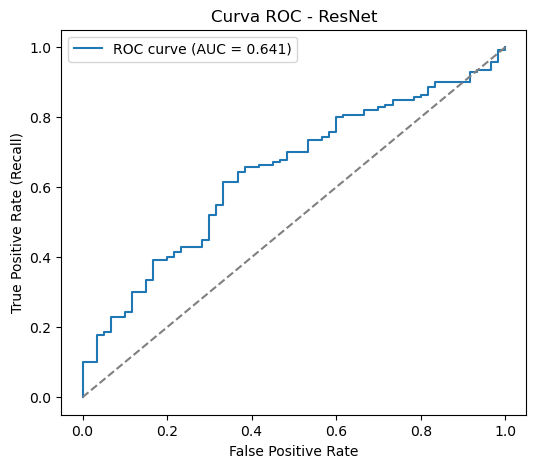

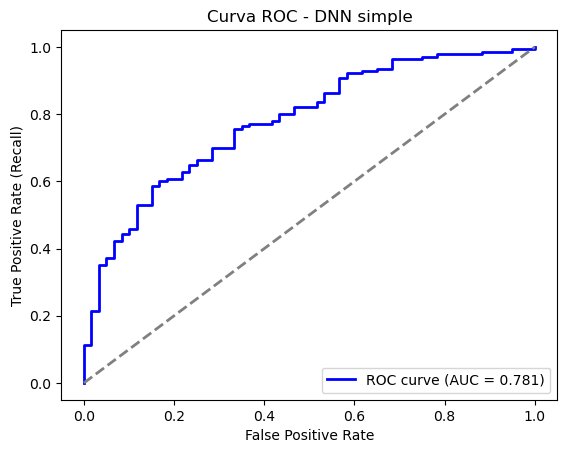

In [62]:
# =========================================================
# Paso 5: Evaluación del modelo
# =========================================================
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

from sklearn.metrics import (
    classification_report, confusion_matrix, roc_curve, auc, RocCurveDisplay
)
import matplotlib.pyplot as plt

# Probabilidades predichas por la DNN
y_pred_proba_dnn = dnn_model.predict(X_test_enc).ravel()


# Usamos el modelo ResNet entrenado (puedes probar también con DNN)
y_pred_proba = resnet_model.predict(X_test_enc).ravel()
y_pred = (y_pred_proba >= 0.5).astype(int)

# Reporte de métricas
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred, target_names=["Good", "Bad"]))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print("\n=== Matriz de confusión ===")
print(cm)

# Curva ROC - ResNet
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label="ROC curve (AUC = {:.3f})".format(roc_auc))
plt.plot([0,1],[0,1],"--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("Curva ROC - ResNet")
plt.legend()
plt.show()

# Curva ROC - DNN
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_dnn)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color="blue", lw=2, 
         label=f"ROC curve (AUC = {roc_auc:.3f})")
plt.plot([0, 1], [0, 1], color="gray", lw=2, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("Curva ROC - DNN simple")
plt.legend(loc="lower right")
plt.show()


### *Resultados:*

1. **Matriz de confusión:**

* 35 clientes buenos correctamente clasificados.

* 25 clientes buenos mal clasificados como malos (falsos negativos financieros: clientes rechazados injustamente).

* 93 clientes malos correctamente identificados.

* 47 clientes malos mal clasificados como buenos (falsos positivos financieros: riesgo de impago).


2. **Reporte de clasificación:**

* Good (clientes buenos):

  * Precision: 0.43 → cuando predice "Good", solo acierta el 43%.

  * Recall: 0.58 → detecta al 58% de los clientes realmente buenos.

  * F1: 0.49 → desempeño bajo (equilibrio entre precisión y recall).

* Bad (clientes malos):

  * Precision: 0.79 → cuando predice "Bad", suele acertar bastante.

  * Recall: 0.66 → detecta 66% de los clientes realmente malos, pero deja escapar un 34%.

  * F1: 0.72 → desempeño aceptable, pero aún mejorable.

* Global:

  * Accuracy: 0.64 (solo 64% de aciertos en test).

  * Macro avg (balanceado entre clases): ~0.61 → pobre en clase "Good".

  * Weighted avg: ~0.65 → dominado por la clase mayoritaria ("Bad").

El modelo está sesgado hacia predecir más "Bad", ya que era la clase reforzada con SMOTE pero sigue siendo más fácil de aprender.

3. **Gráfico curva ROC - ResNet (AUC = 0.641)**

En el gráfico se observa que el AUC mide la capacidad del modelo de distinguir entre clases. Con 0.641, el modelo es mejor que el azar (0.5), pero bastante lejos de un buen clasificador (>0.75). La curva no se aleja demasiado de la diagonal gris (clasificación aleatoria).

Conclusión, la ResNet tiene un poder predictivo limitado en este dataset.

4. **Gráfico curva ROC - DNN Simple (AUC = 0.781)**

En el gráfico se observa que el AUC mide la capacidad del modelo de distinguir entre clases. 0.781, el modelo es mucho mejor que el azar (0.5), y es mucho mejor que el de ResNet (AUC = 0.641) y, de acuerdo a su resultado, se puede considerar un buen clasificador (>0.75).

Conclusión, la DNN simple tiene un poder predictivo mucho mejor que la de ResNet sobre esta dataset.

En resumen, la ResNet clasifica mejor los "Bad" que los "Good", pero su rendimiento global es bajo (AUC=0.64, acc=64%). Además, los Falsos positivos (47 casos) representan un gran riesgo financiero por lo que el modelo no es confiable aún para decisiones de crédito. En cambio, la DNN simple (con AUC≈0.78 y acc≈70%) fue claramente superior, más balanceada y segura para el negocio. 

# **Conclusión**

El sistema inteligente de scoring crediticio basado en redes neuronales profundas permitió evaluar la capacidad predictiva de dos arquitecturas: una DNN simple y una ResNet tabular.

Los resultados muestran que:
	
 *	La DNN simple alcanzó un rendimiento significativamente superior (Accuracy ≈ 70%, AUC ≈ 0.78), lo que indica un buen poder discriminativo entre clientes “buenos” y “malos”. Este modelo logró generalizar sin evidencias fuertes de sobreajuste, capturando adecuadamente las relaciones no lineales entre las variables numéricas y categóricas.
	
 *	En contraste, la ResNet tabular obtuvo un desempeño más bajo (Accuracy ≈ 64%, AUC ≈ 0.64), clasificando de manera aceptable a los clientes “malos”, pero generando un número elevado de falsos positivos (clientes malos clasificados como buenos), lo que representa un riesgo financiero significativo.

Desde el punto de vista de negocio, la DNN simple resulta la opción más confiable, dado que reduce el riesgo de impago frente a la ResNet y mantiene un balance razonable entre precisión y recall. Sin embargo, aún persisten desafíos:
	
 *	El modelo muestra sesgo hacia la clase “Bad”, penalizando a clientes realmente “Good” (falsos negativos).

 * La precisión en la predicción de clientes “Good” es baja (43%), lo que podría limitar la inclusión financiera de clientes solventes.

En conclusión, la implementación de la DNN simple como modelo base es viable para un primer prototipo de scoring crediticio. No obstante, para una aplicación real en el sector financiero se recomienda:

1.	Optimización de hiperparámetros y uso de técnicas de regularización.

2.	Explorar embeddings más refinados para variables categóricas.

3.	Ajustar el umbral de decisión en función del costo financiero de falsos positivos y falsos negativos.

4.	Incorporar técnicas de interpretabilidad (ej. SHAP, LIME) para garantizar transparencia y confianza regulatoria.

Con estas mejoras, el sistema podría evolucionar hacia una herramienta robusta, explicable y de alto valor práctico para la toma de decisiones crediticias.

# Reflexión crítica

El uso de redes neuronales profundas en scoring crediticio abre un camino prometedor para mejorar la predicción del riesgo de impago, pero también plantea desafíos relevantes desde una perspectiva ética y práctica. En primer lugar, un modelo entrenado sobre datos históricos puede reproducir o incluso amplificar sesgos presentes en la información original (por ejemplo, relacionados con género, edad, estado civil o nacionalidad), lo que podría derivar en exclusiones injustas o decisiones discriminatorias. Además, aunque la DNN simple alcanzó buenos resultados en métricas cuantitativas, su carácter de “caja negra” dificulta la explicación transparente de las decisiones. En un contexto bancario, donde la confianza y la transparencia son esenciales, este aspecto es crítico: un equipo de riesgos no solo necesita conocer si el modelo predice bien, sino también por qué toma cada decisión y qué variables influyen en la clasificación de un cliente como “buen” o “mal” pagador.

La ausencia de técnicas de explicabilidad en este análisis (como SHAP o LIME) deja un vacío importante, ya que sin ellas resulta difícil justificar las decisiones frente a reguladores o frente a los propios clientes. En consecuencia, aunque el modelo es útil como prototipo, su implementación real requeriría acompañarlo de mecanismos de interpretabilidad, auditoría de sesgos y ajustes éticos, para asegurar que la tecnología no solo sea precisa, sino también justa, confiable y comprensible para los equipos bancarios y los usuarios finales.